<a href="https://colab.research.google.com/github/arntka110/Post-Test2-Data-Mining/blob/main/C2_110__Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
#Import library
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
# Buat dataset
data = pd.read_csv("dataset_market_basket.csv")
dfm = pd.DataFrame(data)

In [ ]:
# Melihat data Tabular item
dfm

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1 Item set buat nampilkan berapa set tiap item
dfm.sum()

whole milk             5.0
pastry                 1.0
salty snack            1.0
sausage                4.0
semi-finished bread    1.0
yogurt                 1.0
soda                   3.0
pickled vegetables     1.0
canned beer            1.0
misc. beverages        1.0
hygebe articles        1.0
rolls/buns             4.0
frankfurter            2.0
whipped/sour cream     1.0
curd                   1.0
beef                   1.0
white bread            1.0
butter                 1.0
frozen vegetables      1.0
other vegetables       1.0
tropical fruit         1.0
sugar                  1.0
butter milk            1.0
specialty chocolate    1.0
frozen meals           1.0
dental care            1.0
root vegetables        1.0
detergent              1.0
dish cleaner           1.0
cling film/bags        1.0
dtype: float64

In [ ]:
# Menampilkan item
dfm.columns

Index(['whole milk', 'pastry', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygebe articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [ ]:
# 2 Item set = kombinasi 2 item
from itertools import permutations # library untuk membuat kombinasi barang

# Extract unique items.
rules = list(permutations(dfm.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygebe articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('p

In [ ]:
# Memfilter pada item kombinasi, kemudian hitung item yang muncul saja
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(dfm[(dfm[rule[0]]==1) & (dfm[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygebe articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygebe articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls/b

In [ ]:
hitung = {} # Mengganti dictionary
for rule in rule_baru:
  banyak_data= len(dfm[
      (dfm[rule[0]]==1) & (dfm[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygebe articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 "('cann

In [ ]:
# untuk melihat banyak transaksi
len(dfm)

19

In [ ]:
# List support
# supp = [i/len(dfm)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(dfm)*100}%")

---
('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygebe articles') support = 5.263157894736842%
('sausage', 'rolls/buns') support = 10.526315789473683%
('semi-finished bread', 'whole m

In [ ]:
dfm["whole milk"].sum()

5.0

In [ ]:
# List Confidence
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) # Mengubah string ke list
  print(f"{i[0]}->{i[1]}  Confidence = {ab/dfm[i[0]].sum()*100}%")

---
whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygebe articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage  Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%
soda->wh

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

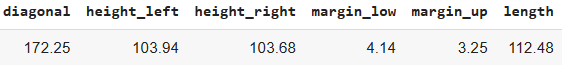
<!-- 1412 -->

##Data Understanding

In [ ]:
# Import library
import pandas as pd
import seaborn as sns

In [ ]:
# Collect dataset
data = pd.read_csv("deteksi_uang_palsu.csv")
dfu = pd.DataFrame(data)
dfu

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


**Penjelasan tiap kolom liat dari sumber**

<Axes: xlabel='is_genuine', ylabel='count'>

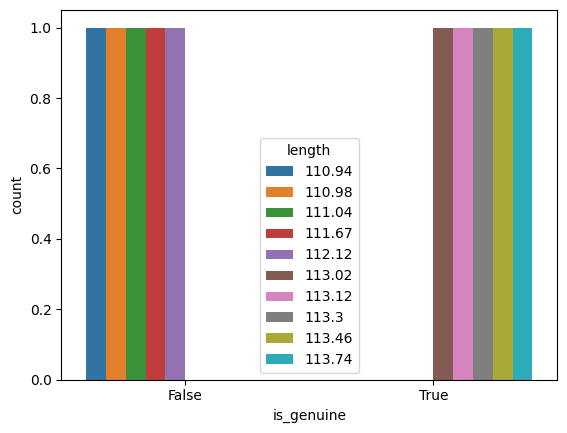

In [ ]:
# Visualisasi
sns.countplot(data=dfu,x="is_genuine",hue="length")

**Penjelasan Visualisasi**

##Data Preparation

In [ ]:
# Menampilkan data
dfu

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [ ]:
# Melihat data yg kosong
dfu.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [ ]:
# Melihat panjang data
len(dfu)

10

In [ ]:
dfu.isna().sum() / len(dfu) * 100

is_genuine      0.0
diagonal        0.0
height_left     0.0
height_right    0.0
margin_low      0.0
margin_up       0.0
length          0.0
dtype: float64

###Target dan Data

In [ ]:
# Membuat tabel jarak
# Membuat dataframe dari data baru
dfub = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

In [ ]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
distances = []
for i in range(len(dfu)):
    row = dfu.iloc[i]
    distance = np.sqrt((row['diagonal'] - dfub['diagonal']) ** 2 +
                       (row['height_left'] - dfub['height_left']) ** 2 +
                       (row['height_right'] - dfub['height_right']) ** 2 +
                       (row['margin_low'] - dfub['margin_low']) ** 2 +
                       (row['margin_up'] - dfub['margin_up']) ** 2 +
                       (row['length'] - dfub['length']) ** 2)
    distances.append(distance)

In [ ]:
# Menambahkan kolom distance ke dataframe utama
dfu['distance'] = distances

In [ ]:
# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(dfu['distance'])

Tabel Jarak : 
0    0    0.671267
dtype: float64
1    0    1.458321
dtype: float64
2    0    0.834626
dtype: float64
3    0    0.910934
dtype: float64
4    0    1.312593
dtype: float64
5    0    2.421281
dtype: float64
6    0    1.741896
dtype: float64
7    0    1.113463
dtype: float64
8    0    1.722034
dtype: float64
9    0    1.738217
dtype: float64
Name: distance, dtype: object


In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

In [ ]:
# Menampilkan data
dfu = pd.read_csv('deteksi_uang_palsu.csv')
dfu

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [ ]:
# Memisahkan data dan target dengan cara mengakses baris
X = dfu.iloc[:, :-1]
y = dfu.iloc[:, -1]

In [ ]:
# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))
dfu['Jarak'] = distances

In [ ]:
# Menyimpan hasil ke file CSV
dfu.to_csv('deteksi_uang_palsu_jarak.csv', index=False)

In [ ]:
# Menampilkan hasil file CSV dari penambahan kolom jarak
dfu

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,200.285783
1,True,171.66,103.68,103.41,4.35,3.33,113.74,201.070850
2,True,172.23,104.00,103.35,4.43,2.95,113.12,200.485558
3,True,172.07,104.21,103.82,4.29,3.35,113.30,200.524023
4,True,171.79,104.57,104.04,4.26,3.15,113.46,200.774364
5,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
6,False,171.56,104.03,103.93,5.47,3.50,111.67,197.874877
7,False,171.90,104.33,104.40,4.70,3.31,112.12,199.106750
8,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021
9,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206


In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

In [ ]:
# Menampilkan data
dfu = pd.read_csv('deteksi_uang_palsu.csv')
dfu

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [ ]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
dfu['distance'] = np.sqrt(
    (dfu['diagonal'] - 172.25)**2
    + (dfu['height_left'] - 103.94)**2
    + (dfu['height_right'] - 103.68)**2
    + (dfu['margin_low'] - 4.14)**2
    + (dfu['margin_up'] - 3.25)**2
    + (dfu['length'] - 112.48)**2
)

In [ ]:
# Mengurutkan data dari kecil ke besar dan menentukan data terdekat
k = int(np.sqrt(len(dfu)))
data_terdekat = dfu.sort_values('distance').head(k)

In [ ]:
# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length  distance  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

In [ ]:
# Impor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Split data menjadi data training dan data testing
X_train = dfu.drop(columns=['is_genuine','distance'],axis=1)
y_train = dfu['is_genuine']

In [ ]:
# Menginisiasi data baru menjadi data tes
test_data = dfub

In [ ]:
# Membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
# Menguji knn dengan data training
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Memprediksi hasil
prediksi = knn.predict(test_data)

In [ ]:
# Menampilkan hasil prediksi
print("Hasil label terbanyak adalah True ")
print("Untuk memprediksi algoritma knn, berdasarkan penggunaan library sklearn adalah : "+ ' '.join(map(str, prediksi)))

Hasil label terbanyak adalah True 
Untuk memprediksi algoritma knn, berdasarkan penggunaan library sklearn adalah : True


# (3) Analisis

> Nama : Ariantika Putri Maharani

> Nim : 2109116110


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

##Struktur CRISP-DM

Analisis menggunakan struktur CRISP-DM tahapannya dimulai dari:
1. Business Understanding, yaitu menjelaskan mengenai latar belakang judul dataset, tujuan penggunaan dataset, tujuan perusahaan, dan tujuan penggunaan algoritma
2. Data Understanding, yaitu berupa 
3. Data Preparation, yaitu berupa

###Business Understanding

**Latar Belakang**

Demensia adalah salah satu penyebab utama kecacatan dan ketergantungan di antara orang tua di seluruh dunia. Hal ini bisa membuat kewalahan, tidak hanya bagi orang yang memilikinya, tetapi juga bagi pengasuh dan keluarga mereka. Sering terjadi kurangnya kesadaran dan pemahaman tentang demensia, yang mengakibatkan stigmatisasi dan hambatan untuk diagnosis dan perawatan. Dampak demensia pada umumnya dapat bersifat fisik, psikologis, sosial dan ekonomi.

**Tujuan Penggunaan Dataset**

Dataset Dementia digunakan untuk memprediksi berapa banyak yang mengidap penyakit demensia berdasarkan dari umur dan jenis kelamin.

**Tujuan Prediksi Dataset**

Data ini dapat dimanfaatkan untuk informasi atau sekadar memberikan pandangan menarik tentang pikiran manusia.

**Tujuan Penggunaan Naive Bayes**

Dari beberapa sumber yang saya baca, tujuan dari penggunaan algoritma naive bayes adalah untuk mengklasifikasikan data berdasarkan probabilitas yang dapat terjadi di masa depan. Selain itu, algoritma naive bayes merupakan algoritma dengan tingkat nilai error yang didapat lebih rendah.

###Data Understanding

####Collect Initial Data

Data yang digunakan bersifat sekunder karena sumber data ini diambil dari Internet.

Link: [Dementia Dataset](https://www.kaggle.com/datasets/shashwatwork/dementia-prediction-dataset)

In [ ]:
#Import library
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

In [ ]:
#Membuat Dataset
data = pd.read_csv("dementia_dataset.csv")
df = pd.DataFrame(data)
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
# Menampilkan data 5 baris pertama
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
# Menampilkan data 5 baris terakhir
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
#Membuat variabel
# Menampilkan dataset dengan label target Demented
df[df["Group"]=="Demented"]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037


In [ ]:
# Menampilkan dataset dengan label target bukan Demented
df[df["Group"]!="Demented"]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
# Menampilkan data untuk usia dibawah 70 tahun
df[df["Age"]<70]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205
16,OAS2_0009,OAS2_0009_MR2,Demented,2,576,M,R,69,12,2.0,24.0,0.5,1480,0.791,1.186
17,OAS2_0010,OAS2_0010_MR1,Demented,1,0,F,R,66,12,3.0,30.0,0.5,1447,0.769,1.213
18,OAS2_0010,OAS2_0010_MR2,Demented,2,854,F,R,68,12,3.0,29.0,0.5,1482,0.752,1.184
41,OAS2_0022,OAS2_0022_MR1,Nondemented,1,0,F,R,61,16,3.0,30.0,0.0,1313,0.805,1.337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,OAS2_0183,OAS2_0183_MR2,Nondemented,2,182,F,R,66,13,2.0,30.0,0.0,1506,0.740,1.165
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
# Menampilkan nilai rata-rata, min, max, dan standar deviasi untuk kolom Age
df.agg({"Age": ["mean", "min", "max", "std"]})

,Age
mean,77.013405
min,60.000000
max,98.000000
std,7.640957


####Describe Data

In [ ]:
# Menampilkan data secara rinci
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
# Tampilkan info dataset (df.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


**Penjelasan dataset (df.info())**

Sebelum melakukan analisis, terlebih dahulu digunakan fungsi “ .info ” untuk menampilkan informasi data yang akan dilakukan analisis.

Data yang akan dianalisis memiliki 15 variabel (kolom), yaitu Subject ID, MRI ID, Group, Visit, MR Delay, M/F, Hand, Age, EDUC, SES, MMSE, CDR, eTIV, nWBV, ASF dengan tipe datanya adalah float, int, dan object.

In [ ]:
df.shape

(373, 15)

####Explore Data

Explore Data dilakukan dengan menggunakan Visualisasi Data.
Visualisasi data adalah sebuah tahapan menampilkan data dalam bentuk visual. Tujuan utama dari tahap ini adalah untuk membuat gambaran besar data sehingga lebih mudah untuk dipahami.

In [ ]:
#Tampilkan data
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


#####Visualisasi Comparison

In [ ]:
# Membuat visualisasi yang menampilkan berapa banyak yang termasuk kedalam kelompok Demented dan tidak
px.histogram(df,x="Group", color="Group")

In [ ]:
# Membuat visualisasi yang menampilkan berapa banyak kelompok Demented dan tidak berdasarkan umur
px.histogram(df,x="Age",color="Group")

In [ ]:
# Membuat visualisasi yang menampilkan berapa banyak kelompok Demented dan tidak berdasarkan Gender
px.histogram(df,x="M/F",color="Group")

**Penjelasan Visualisasi Comparison**
1. Visualisasi yang menampilkan berapa banyak yang termasuk kedalam kelompok Demented dan tidak. Pada visualisasi ini data yang ditampilkan dalam bentuk histogram. Tujuannya adalah agar dapat memudahkan dalam membaca informasi mengenai jumlah banyaknya kelompok yang mengidap Demented dan tidak.
2. Visualisasi yang menampilkan berapa banyak kelompok yang mengidap Demented dan tidak berdasarkan umur. Pada visualisasi ini jumlah data yang ditampilkan dalam bentuk histogram. Tujuannya adalah agar mengetahui umur berapa saja yang termasuk kedalam pengidap Demented dan tidak.
3. Visualisasi yang menampilkan berapa banyak kelompok Demented dan tidak berdasarkan Gender. Pada visualisasi ini data ditampilkan dalam bentuk histogram untuk mengetahui banyaknya jumlah kelompok Demented dan tidak berdasarkan Gender.



#####Visualisasi Distribution

In [ ]:
# Menampilkan data
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
# Membuat historgram untuk Age
px.histogram(df,x="Age")

In [ ]:
# Membuat historgram untuk EDUC
px.histogram(df,x="EDUC")

In [ ]:
# Boxplot untuk Age
px.box(df,x="Age")

In [ ]:
# Boxplot untuk EDUC
px.box(df,x="EDUC")

**Penjelasan Visualisasi Distribusi**



#####Visualisasi Relationship

In [ ]:
# Buatlah scatterplot untuk Age dan EDUC
px.scatter(df,x="Age",color="EDUC",title="Scatterplot Age dan EDUC")

#####Visualisasi Composition

In [ ]:
# Menampilkan data
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
# Pieplot untuk Group
px.pie(df,names="Group",title="Diagram Pie Group")

In [ ]:
# Pieplot untuk Gender
px.pie(df,names="M/F", title="Diagram Pie Gender")

#####Tambahan

In [ ]:
# Menampilkan data
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


<Axes: xlabel='Age', ylabel='M/F'>

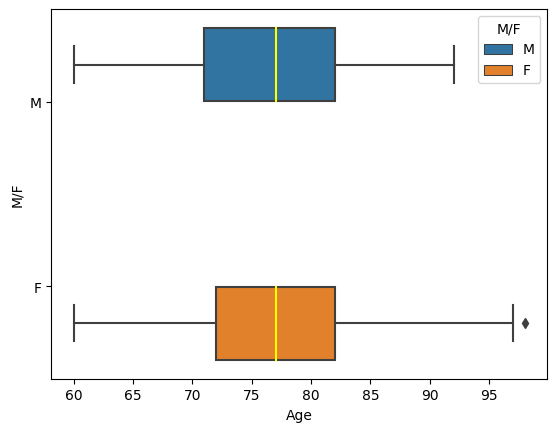

In [ ]:
# Membuat visualisasi boxplot Age dengan Gender sebagai pemisahnya (color)
sns.boxplot(
    data=df, x="Age", y="M/F", hue="M/F",
    medianprops={"color" : "yellow"}
)

<Axes: xlabel='Age', ylabel='Group'>

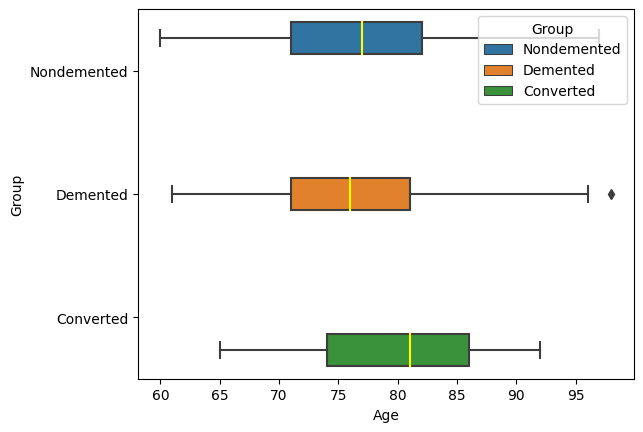

In [ ]:
# Mmebuat visualisasi boxplot Age dengan Group sebagai pemisahnya (color)
sns.boxplot(
    data=df, x="Age", y="Group", hue="Group",
    medianprops={"color" : "yellow"}
)

<Axes: xlabel='Age', ylabel='count'>

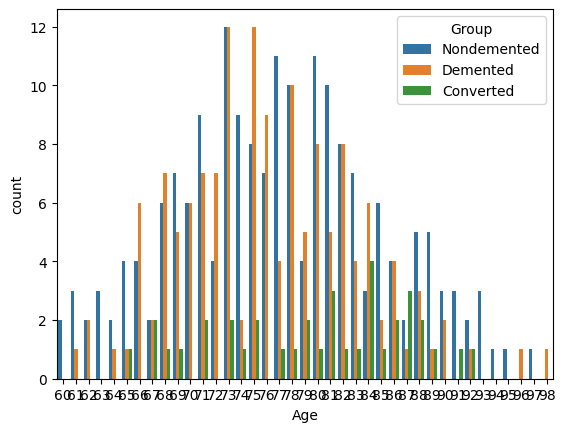

In [ ]:
# Mmebuat visualisasi countplot Age dengan Group sebagai pemisahnya (color)
sns.countplot(data=df,x="Age",hue="Group")

<Axes: >

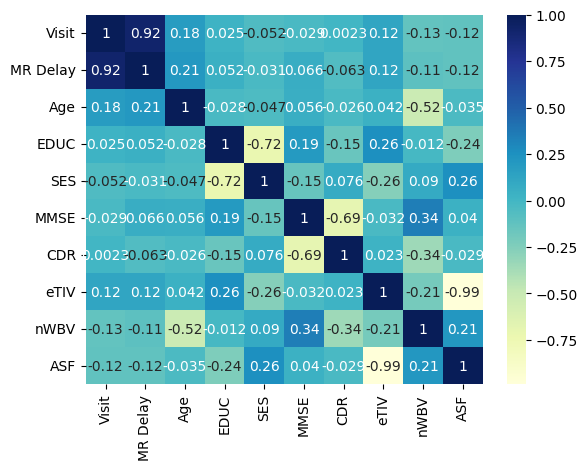

In [ ]:
# Membuat visualisasi heatmap untuk setiap variabel numerik yang ada
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

####Verify Data Quality

##### Algoritma Naive Bayes

In [ ]:
# mengambil dataset
df = pd.read_csv("dementia_dataset.csv")
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
# Membuat data Frame Baru
data = df.drop(["Visit", "MR Delay", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"], axis=1)
dfb = pd.DataFrame(data)
dfb

,Subject ID,MRI ID,Group,M/F,Hand
0,OAS2_0001,OAS2_0001_MR1,Nondemented,M,R
1,OAS2_0001,OAS2_0001_MR2,Nondemented,M,R
2,OAS2_0002,OAS2_0002_MR1,Demented,M,R
3,OAS2_0002,OAS2_0002_MR2,Demented,M,R
4,OAS2_0002,OAS2_0002_MR3,Demented,M,R
...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,M,R
369,OAS2_0185,OAS2_0185_MR3,Demented,M,R
370,OAS2_0186,OAS2_0186_MR1,Nondemented,F,R
371,OAS2_0186,OAS2_0186_MR2,Nondemented,F,R


In [ ]:
# Pindah data Group ke kolom ujung kanan
cols = dfb.columns.tolist()
cols.remove("Group")
cols.append("Group")
dfb = dfb[cols]

# Hitung jumlah data training dan data testing
N_train = len(dfb)

# Hitung jumlah target
target_counts = dfb.groupby("Group")["Group"].count()

# Hitung prior probability untuk setiap target
prob_prio = target_counts/N_train

# Hitung conditional probability untuk setiap target
prob_kond = {}
for col in dfb.columns[:-1]:
  prob_kond[col] = {}
  for val in dfb[col].unique():
    for target in dfb["Group"].unique():
      count = len(df[(df[col] == val) & (dfb["Group"] == target)])
      prob_kond[col][(val,target)] = count/target_counts[target]

In [ ]:
# Fungsi Naive_Bayes
def naive_bayes(a):
  prob_yes = prob_prio["Demented"]
  prob_no = prob_prio["Nondemented"]
  for i, col in enumerate(dfb.columns[:-1]):
    prob_yes *= prob_kond[col][(a[i], "Demented")]
    prob_no *= prob_kond[col][(a[i], "Nondemented")]

  if prob_yes < prob_no:
    result = "Demented", prob_yes
  else:
    result = "Nondemented", prob_no
  return result

# Output hasil
output = naive_bayes(["OAS2_0002", "OAS2_0002_MR3", "F", "R"])
print("Output : ", output)

Output :  ('Nondemented', 0.0)


### Data Preparation

Data preparation adalah proses mempersiapkan raw data
agar dapat digunakan dalam proses analisis nantinya.
Tahapan-tahapan penting dalam data preparation meliputi
cleaning data, dan preprocessing.

#### Select Data

In [ ]:
# Menampilkan Dataset
data = pd.read_csv("dementia_dataset.csv")
df = pd.DataFrame(data)
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


#### Cleaning Data

In [ ]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
len(df)

373

In [ ]:
df.isna().sum() / len(df) * 100

Subject ID    0.000000
MRI ID        0.000000
Group         0.000000
Visit         0.000000
MR Delay      0.000000
M/F           0.000000
Hand          0.000000
Age           0.000000
EDUC          0.000000
SES           5.093834
MMSE          0.536193
CDR           0.000000
eTIV          0.000000
nWBV          0.000000
ASF           0.000000
dtype: float64

In [ ]:
df2 = df.copy(deep=True) # Tujuannya agar saat menghapus data masih bisa di backup

In [ ]:
df2.SES = df.SES.fillna(df.SES.mean())
df2.MMSE = df.MMSE.fillna(df.MMSE.mode()[0])

In [ ]:
df2.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

Setelah mengatasi missing value, selanjutnya menghapus kolom yang tidak perlu.

In [ ]:
df2

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [ ]:
# Menghapus kolom yang terlalu beragam dan kurang penting
df2.drop(columns=["Subject ID","MRI ID"],inplace=True)

In [ ]:
df2

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,R,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,Demented,3,2297,M,R,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,Nondemented,1,0,F,R,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,Nondemented,2,763,F,R,63,13,2.000000,30.0,0.0,1327,0.796,1.323


Encoding

In [ ]:
# Merubah tipe data string/kategori menjadi numerik
df3 = pd.get_dummies(df2)

In [ ]:
df3

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Converted,Group_Demented,Group_Nondemented,M/F_F,M/F_M,Hand_R
0,1,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0,0,1,0,1,1
1,2,457,88,14,2.000000,30.0,0.0,2004,0.681,0.876,0,0,1,0,1,1
2,1,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046,0,1,0,0,1,1
3,2,560,76,12,2.460452,28.0,0.5,1738,0.713,1.010,0,1,0,0,1,1
4,3,1895,80,12,2.460452,22.0,0.5,1698,0.701,1.034,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,82,16,1.000000,28.0,0.5,1693,0.694,1.037,0,1,0,0,1,1
369,3,2297,86,16,1.000000,26.0,0.5,1688,0.675,1.040,0,1,0,0,1,1
370,1,0,61,13,2.000000,30.0,0.0,1319,0.801,1.331,0,0,1,1,0,1
371,2,763,63,13,2.000000,30.0,0.0,1327,0.796,1.323,0,0,1,1,0,1


Perbedaan antara df2 dengan df3 adalah df2 merupakan data yang masih memiliki tipe data string/kategori sedangkan df3 merupakan data yang telah diubah dari tipe string ke tipe numerik.

Outlier Handling

In [ ]:
# Hitung nilai Q1 dan Q3
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)

In [ ]:
print("Q1 Age :",Q1)
print("Q3 Age :",Q3)

Q1 Age : 71.0
Q3 Age : 82.0


In [ ]:
# Hitung nilai IQR
IQR = Q3 - Q1

In [ ]:
print('Q1 1 = ', Q1)
print('Q3 3 = ', Q3)
print('IQR = ', IQR)

Q1 1 =  71.0
Q3 3 =  82.0
IQR =  11.0


In [ ]:
# Mengalikan IQR dengan 1.5 (konstanta untuk menemukan outliers) untuk mendapatkan nilai IQR minimum dan maksimum
# Untuk IQR minimum, kurangi Q1 dengan 1.5 x IQR, sedangkan untuk IQR maksimum, tambahkan Q3 dengan 1.5 x IQR
min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

In [ ]:
print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

IQR minimum =  54.5
IQR maksimum =  98.5


In [ ]:
# Mencari nilai minimum dan maksimum dari data
nilai_min = np.min(df["Age"])
nilai_max = np.max(df["Age"])

In [ ]:
print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Nilai minimum data =  60
Nilai maksimum data =  98


In [ ]:
# Membuat kondisi di mana jika nilai minimum data lebih kecil dari IQR minimum
if (nilai_min < min_IQR):
    print('Ditemukan low outlier')
else:
    print('Tidak ditemukan low outlier')  

if (nilai_max > max_IQR):
    print('Ditemukan high outlier')
else:
    print('Tidak ditemukan high outlier')

Tidak ditemukan low outlier
Tidak ditemukan high outlier


Dapat dilihat bahwa tidak terdapat low outlier atau data yang nilainya jauh di bawah range nilai normal, dan juga high outlier atau data yang nilainya jauh di atas range nilai normal.

In [ ]:
# Menampilkan data yang termasuk outlier
low_out = []
high_out = []

for i in df["Age"]:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : ', low_out)
print('High outlier : ', high_out)

Low outlier :  []
High outlier :  []
